### Import Library

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score,roc_curve, roc_auc_score,r2_score, mean_squared_error  
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

### Import CSV File

In [47]:
feature = pd.read_csv('classification_feat.csv')
predictor = pd.read_csv('classification_pred.csv', header = 0)
feature['Quarter end'] = pd.to_datetime(feature['Quarter end'])
feature.set_index("Quarter end", inplace=True)
predictor = predictor.drop(columns = 'Unnamed: 0')

## Feature Importance

In [48]:
def plot_feature_importance(model, x_train, n=27):
    # extract and sort the feature importance
    features = model.feature_importances_
    feature_names = x_train.columns.values
    
    # combine the features importance and column names into a matrix and sort them
    feature_matrix = np.array([features, feature_names])
    feature_matrix = feature_matrix.transpose()
    feature_matrix.sort(0)
    
    # divide the column names and feature importance
    sorted_feat = feature_matrix[:, 0]
    sorted_columns = feature_matrix[:, 1]
    
     # plot the features
    plt.figure(figsize=(16, 12))
    try:
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
    
    except:
        # if n features is greater than the amount that actually exists
        n = len(sorted_feat)
        plt.barh(sorted_columns[-n:], sorted_feat[-n:], align='center')
        
    plt.yticks(sorted_columns[-n:], sorted_columns[-n:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    return

### Confusion Matrix Function Plot

In [49]:
labels = ['Growth', 'Value']
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    
    # Compute confusion matrix
#     cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
#     print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


### Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [51]:
log_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)

### Model Testing

In [52]:
#can you improve it? 
y = predictor

X  = feature

In [53]:
#train_test_littttttt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [54]:
no_symb = X_train.drop(columns = 'symbol')

### Cross Validation 

In [55]:
log_cv_score = cross_val_score(log_reg, no_symb, y_train, cv=3)
mean_log_cv_score = np.mean(log_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_log_cv_score * 100))
# Mean Cross Validation Score: 67.31%

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

Mean Cross Validation Score: 67.31%


In [57]:
#fit our model with our training data
log_reg.fit(no_symb,y_train)

# LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
#                    intercept_scaling=1, l1_ratio=None, max_iter=100,
#                    multi_class='warn', n_jobs=None, penalty='l2',
#                    random_state=2, solver='warn', tol=0.0001, verbose=0,
#                    warm_start=False)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1e+16, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
no_symtest = X_test.drop(columns='symbol')

In [59]:
test_preds = log_reg.predict(no_symtest)

In [60]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

# 0.6647493837304848

0.6647493837304848

### Confusion Matrix

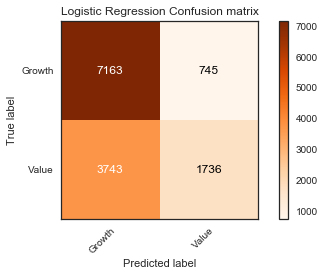

              precision    recall  f1-score   support

           0       0.66      0.91      0.76      7908
           1       0.70      0.32      0.44      5479

    accuracy                           0.66     13387
   macro avg       0.68      0.61      0.60     13387
weighted avg       0.67      0.66      0.63     13387



In [61]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Logistic Regression Confusion matrix')

plt.show()

print(classification_report(y_test, test_preds))

### Grid Search for Logistic Regression

In [36]:
lg_reg = LogisticRegression(fit_intercept=False, C=1e16, random_state=2)
lg_param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,45]}

In [37]:
log_grid_search = GridSearchCV(lg_reg, lg_param_grid, cv=3, return_train_score=True)
print(log_grid_search.fit(no_symb,y_train))


# GridSearchCV(cv=3, error_score='raise-deprecating',
#              estimator=LogisticRegression(C=1e+16, class_weight=None,
#                                           dual=False, fit_intercept=False,
#                                           intercept_scaling=1, l1_ratio=None,
#                                           max_iter=100, multi_class='warn',
#                                           n_jobs=None, penalty='l2',
#                                           random_state=2, solver='warn',
#                                           tol=0.0001, verbose=0,
#                                           warm_start=False),
#              iid='warn', n_jobs=None,
#              param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25, 45],
#                          'penalty': ['l1', 'l2']},
#              pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
#              scoring=None, verbose=0)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-pa

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, w

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/flatironschool/anaconda3/lib/python3.7/site-

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1e+16, class_weight=None,
                                          dual=False, fit_intercept=False,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25, 45],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:
def performance_model(model, name, plot=False):
    print(name)
    print('-'*20)
    
    print('** TRAINING PERFORMANCE **')
    print('-> Accuracy Score:', accuracy_score(y_train, model.predict(no_symb)) )
    print('-> Precision Score: {}'.format(precision_score(y_train, model.predict(no_symb))))
    print('-> Recall Score: {}'.format(recall_score(y_train, model.predict(no_symb))))
    print('-> F1 Score: {}'.format(f1_score(y_train, model.predict(no_symb))))
    print('-> AUC:', roc_auc_score(y_train, model.predict_proba(no_symb)[:, 1] ))
    
    print('\n** TESTING PERFORMANCE')
    print('-> Accuracy Score:', accuracy_score(y_test, model.predict(no_symtest)) )
    print('-> Precision Score: {}'.format(precision_score(y_test, model.predict(no_symtest))))
    print('-> Recall Score: {}'.format(recall_score(y_test, model.predict(no_symtest))))
    print('-> F1 Score: {}'.format(f1_score(y_test, model.predict(no_symtest))))
    print('-> AUC:', roc_auc_score(y_test, model.predict_proba(no_symtest)[:, 1] ))
    print()
    
    if plot:
        fpr, tpr, thres = roc_curve(y_test, model.predict_proba(no_symtest)[:, 1],pos_label=1)
        plt.figure(figsize=(4, 4))
        plt.plot(fpr, tpr, label='Test')
        plt.xlabel('FPR')
        plt.ylabel('TPR')
        plt.show()

Logistic Regression default
--------------------
** TRAINING PERFORMANCE **
-> Accuracy Score: 0.8077559880790316
-> Precision Score: 0.8346709470304976
-> Recall Score: 0.6580493537015276
-> F1 Score: 0.7359110437199898
-> AUC: 0.8849183270336431

** TESTING PERFORMANCE
-> Accuracy Score: 0.8024202584596997
-> Precision Score: 0.8321612751992499
-> Recall Score: 0.647928454097463
-> F1 Score: 0.7285787583376091
-> AUC: 0.878431308468634



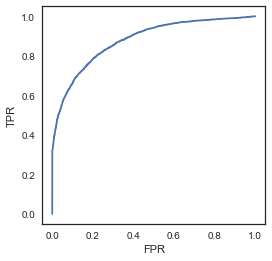

In [63]:
performance_model(log_grid_search,"Logistic Regression default",plot=True)

In [65]:
log_gs_training_score = np.mean(log_grid_search.cv_results_['mean_train_score'])
log_gs_testing_score = log_grid_search.score(no_symb, y_train)

#Predict values based on new parameters
y_pred_acc = log_grid_search.predict(no_symtest)

# New Model Evaluation metrics 
print("Mean Training Score:", log_gs_training_score*100)
print("Mean Testing Score:", log_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
log_grid_search.best_params_


# Mean Training Score: 73.15830524084208
# Mean Testing Score: 80.77559880790317
# Accuracy Score : 0.8024202584596997
# Precision Score : 0.8321612751992499
# Recall Score : 0.647928454097463
# F1 Score : 0.7285787583376091
# Best Parameter Found:
# {'C': 45, 'penalty': 'l1'}

Mean Training Score: 73.15830524084208
Mean Testing Score: 80.77559880790317
Accuracy Score : 0.8024202584596997
Precision Score : 0.8321612751992499
Recall Score : 0.647928454097463
F1 Score : 0.7285787583376091
Best Parameter Found:


{'C': 45, 'penalty': 'l1'}

### Grid Search Confusion Matrix

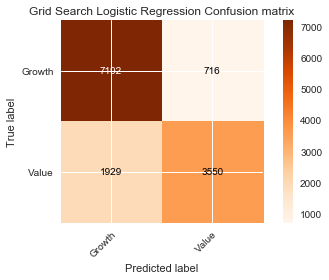

In [39]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Grid Search Logistic Regression Confusion matrix')

plt.show()

# #Logistic Regression (Grid Search) Confusion matrix
# confusion_matrix(y_test,y_pred_acc)

### ROC AUC GRAPH

In [66]:
logreg = LogisticRegression(fit_intercept = False, C = 1e12, solver='liblinear') #Starter code
model_log = logreg.fit(no_symb, y_train.values.ravel())
print(model_log)

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [70]:
# Your code here
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(no_symtest)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(no_symb)
train_fpr, train_tpr, thresholds = roc_curve(y_train, y_train_score)

AUC: 0.7109978126359362


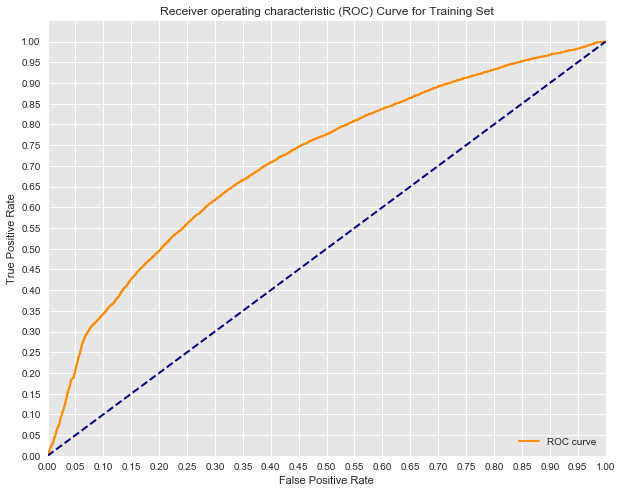

In [71]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(train_fpr, train_tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Training Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(train_fpr, train_tpr)))
plt.show()

# AUC: 0.7109978126359362

AUC: 0.7064116745751909


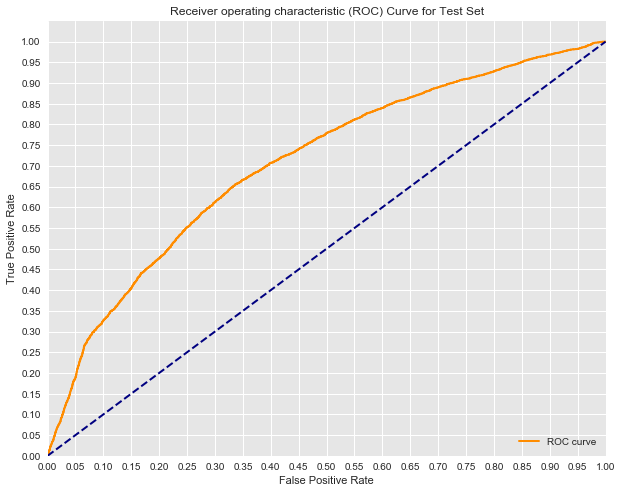

In [72]:
#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()


# AUC: 0.7064116745751909